# Linear and Quadratic Discriminant Analyses

## Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique that is particularly useful for classification problems. Unlike some other dimensionality reduction techniques that focus solely on preserving variance or pairwise distances, LDA aims to find a lower-dimensional space that maximizes class separability {cite:p}`izenman2009modern,Li2023LDA`. LDA explicitly considers class labels, making it suitable for classification tasks {cite:p}`zhao2020feature`. It also helps to mitigate the curse of dimensionality by reducing the dimensionality while preserving class information {cite:p}`zhang2009advanced`. LDA can be applied to various domains, such as face recognition, bioinformatics {cite:p}`sharma2015linear`, and chemical shift analysis {cite:p}`romero2022linear`.

**Objective:**

The main goal of LDA is to find a linear transformation of the original feature space that maximizes the separation between different classes while minimizing the variance within each class. This objective is also known as Fisher's criterion or the Rayleigh quotient. It can be mathematically expressed as {cite:p}`izenman2009modern`:

\begin{equation}
\max_W \frac{W^T S_B W}{W^T S_W W},
\end{equation}
where $W$ is the transformation matrix, $S_B$ is the between-class scatter matrix, and $S_W$ is the within-class scatter matrix. The optimal $W$ can be obtained by solving the generalized eigenvalue problem:

\begin{equation}
(S_W^{-1} S_B) W = \lambda W,
\end{equation}

where $\lambda$ are the eigenvalues and $W$ are the eigenvectors {cite:p}`li2022mean`. The eigenvectors corresponding to the largest eigenvalues are selected as the new axes of the transformed feature space.

The key steps of LDA are as follows {cite:p}`izenman2009modern,zhao2020feature,romero2022linear,Li2023LDA`:

1. **Compute Class Means:** Calculate the mean vector for each class in the original feature space. This can be done by averaging the feature values of all the samples belonging to each class.

2. **Compute Scatter Matrices:**
   - Within-Class Scatter Matrix ($S_W$): This matrix measures the variance within each class. It's computed by summing up the individual scatter matrices for each class. The scatter matrix for a class is obtained by multiplying the difference between each sample and the class mean by its transpose.
   - Between-Class Scatter Matrix ($S_B$): This matrix measures the separation between classes. It's computed by calculating the scatter between the class means and the overall mean. The overall mean is obtained by averaging the feature values of all the samples in the dataset.

3. **Calculate Eigenvalues and Eigenvectors:**
   - Compute the eigenvalues and eigenvectors of the matrix $(S_W^{-1} S_B)$. These eigenvalues represent the discriminative power of the corresponding eigenvectors. The eigenvectors are the directions that maximize the ratio of between-class variance to within-class variance.

4. **Select Top Eigenvectors:**
   - Sort the eigenvalues in descending order and select the top $k$ eigenvectors corresponding to the largest eigenvalues. These eigenvectors become the new axes of the transformed feature space. The value of $k$ depends on how many dimensions you want to reduce your data to.

5. **Project Data:**
   - Project the original data points onto the selected eigenvectors to obtain the reduced-dimensional representation. This can be done by multiplying the original feature matrix by the matrix of eigenvectors.

The advantages of LDA are as follows {cite:p}`izenman2009modern,zhao2020feature,romero2022linear,Li2023LDA`:

* LDA explicitly considers class labels, making it suitable for classification tasks. Unlike some other dimensionality reduction techniques that focus solely on preserving variance or pairwise distances, LDA aims to find a lower-dimensional space that maximizes class separability {cite:p}`jelodar2019latent`. This means that LDA can capture the differences between classes and make them more distinguishable in the transformed feature space.

* It aims to maximize class separability, which can improve classification performance. By reducing the within-class variance and increasing the between-class variance, LDA can enhance the discriminative power of the features and make the decision boundaries more clear and accurate. This can lead to higher accuracy and lower error rates for classification models.

* LDA can help mitigate the curse of dimensionality by reducing the dimensionality while preserving class information. The curse of dimensionality refers to the problem of high-dimensional data, which can cause computational difficulties, overfitting, and poor generalization. By projecting the data onto a lower-dimensional space, LDA can reduce the complexity and redundancy of the data, while retaining the essential information for classification. This can improve the efficiency and robustness of the models.

Limitations of LDA {cite:p}`izenman2009modern,zhao2020feature,romero2022linear,Li2023LDA`:
- LDA assumes that the classes are linearly separable and that the data is normally distributed within each class.
- It may not work well when the classes are overlapping or when the assumptions of normality are not met.
- LDA is supervised and requires labeled data for training.

Use Cases {cite:p}`izenman2009modern,zhao2020feature,romero2022linear,Li2023LDA`:
- Classification problems where dimensionality reduction is desired.
- Face recognition, where LDA can be used to extract features that enhance differences between individuals.

### Using LDA with scikit-learn (sklearn)

LDA can be implemented using libraries like scikit-learn in Python. The `LinearDiscriminantAnalysis` class in scikit-learn provides an easy way to perform LDA for dimensionality reduction and classification {cite:p}`sklearnUserGuide`.

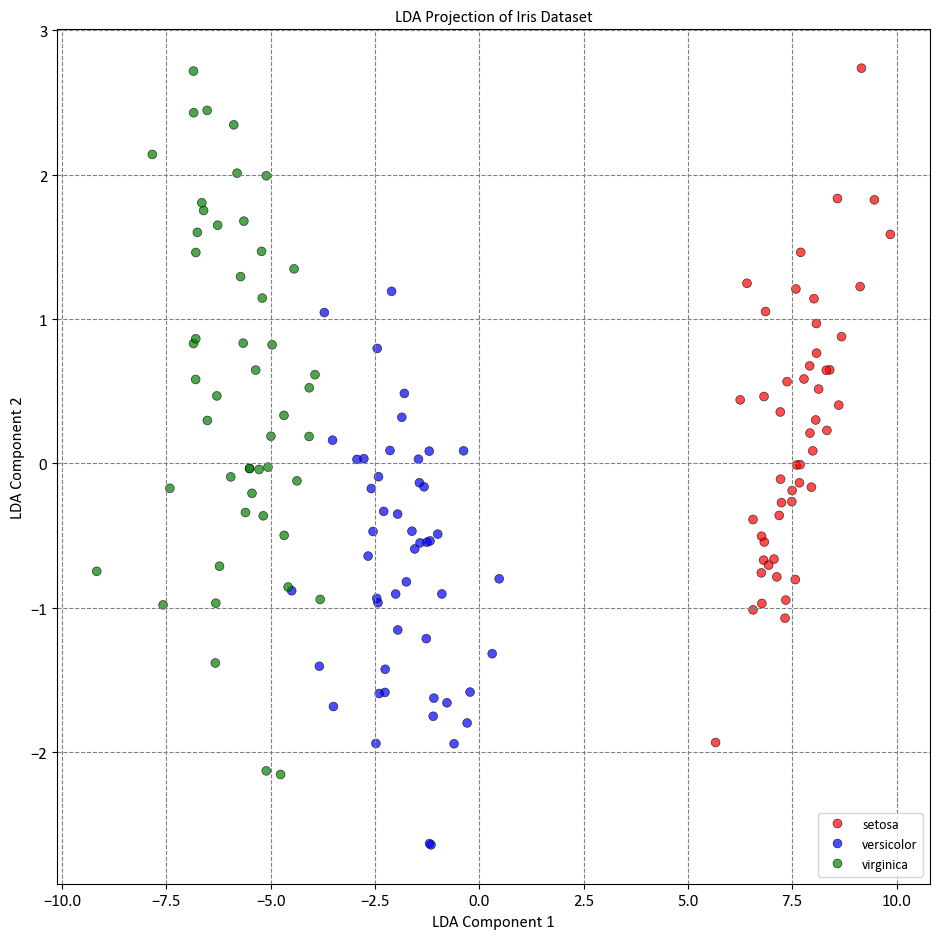

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('../mystyle.mplstyle')

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the LDA model to the data and transform it
X_lda = lda.fit_transform(X, y)

# Create a scatter plot using Seaborn
fig, ax = plt.subplots(1, 1, figsize=(9.5, 9.5))
scatter = sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1],
                          hue=y,
                          palette=['Red', 'Blue', 'Green'],
                          edgecolor='k', alpha=0.7, s=40, ax=ax)

# Set labels and title
ax.set(xlabel='LDA Component 1', ylabel='LDA Component 2', 
       title='LDA Projection of Iris Dataset')

# Set legend
handles, labels = scatter.get_legend_handles_labels()
_ = ax.legend(handles, target_names, loc='lower right')

# Display the plot with tight layout
plt.tight_layout()

In this example, we loaded the Iris dataset, which is a common dataset for classification tasks. We then created an instance of `LinearDiscriminantAnalysis` with `n_components` set to 2, indicating that we want to reduce the dimensionality to 2 dimensions. We fit the LDA model to the data using the `fit_transform` method, which both fits the model and transforms the data to the reduced-dimensional space.

Keep in mind that LDA is a supervised technique, so you need to provide the class labels (`y`) when fitting the model. The resulting `X_lda` will contain the transformed data in the lower-dimensional space.

The `LinearDiscriminantAnalysis` class in scikit-learn also provides other useful attributes and methods, such as `explained_variance_ratio_` to see the explained variance of each component, and `coef_` to access the linear coefficients of the original features that contribute to each component.

If you want to use LDA for classification, you can use the transformed data `X_lda` as input to a classifier, like logistic regression or a support vector machine, to perform classification tasks in the reduced-dimensional space.

Remember that LDA makes certain assumptions about the data distribution and class separability. It's important to evaluate the performance of the reduced-dimensional representation on your specific task and dataset.

## Quadratic Discriminant Analysis

Quadratic Discriminant Analysis (QDA) represents a flexible advancement of Linear Discriminant Analysis (LDA), providing enhanced modeling capabilities for class distributions. While LDA assumes consistent covariance matrices across classes, QDA allows for distinct covariance matrices for individual classes. This unique characteristic empowers QDA to effectively capture intricate nonlinear associations between features and classes, thereby accommodating the modeling of complex data structures {cite:p}`izenman2009modern,li2022mean`.

**Primary Goal:**
The core objective of Quadratic Discriminant Analysis is to identify a quadratic transformation within the original feature space that maximizes the posterior probability for each class, based on the available features. This objective is firmly rooted in Bayes' theorem, which establishes a connection between the posterior class probability and the product of the class's prior probability and the likelihood of observing the given features given that class. QDA operates under the assumption that the likelihood of features, given a specific class, adheres to a multivariate normal distribution. This distribution encompasses class-specific parameters such as mean and covariance matrix.

In practice, QDA derives distinct quadratic discriminant functions for each class. These functions encapsulate the logarithm of the posterior probability for the respective class, taking into account the provided features. The outcome of this process is the creation of decision boundaries expressed as quadratic curves, effectively shaping QDA as a quadratic classifier {cite:p}`izenman2009modern,li2022mean`.

### The Key Steps of Quadratic Discriminant Analysis (QDA)

Quadratic Discriminant Analysis (QDA) entails a series of pivotal steps for effective classification, as outlined below:

1. **Estimate Class-Specific Parameters:** The initial step involves estimating essential parameters for each class within the original feature space. These parameters comprise the mean vector, covariance matrix, and prior probability for every class. To accomplish this, sample statistics derived from the training data are employed. These include the sample mean, sample covariance, and the proportion of samples belonging to each class {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

2. **Compute Quadratic Discriminant Functions:** Quadratic discriminant functions are then computed for each class using the estimated parameters. These functions encapsulate the logarithm of the posterior probability of a given class, given the observed features. Mathematically, the discriminant function for class $i$ can be expressed as {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`:

\begin{equation}
g_i(x) = -\frac{1}{2} \log |\Sigma_i| - \frac{1}{2} (x - \mu_i)^T \Sigma_i^{-1} (x - \mu_i) + \log \pi_i,
\end{equation}

Where:
- $x$ represents the feature vector of the data point.
- $\mu_i$ corresponds to the mean vector of class $i$.
- $\Sigma_i$ denotes the covariance matrix of class $i$.
- $\pi_i$ signifies the prior probability of class $i$.

3. **Data Classification:** To classify new data points, their feature values are inputted into the computed discriminant functions. The class associated with the highest resulting discriminant function value is selected as the classification choice. This selection is accomplished by comparing the values of $g_i(x)$ for all classes and selecting the one with the maximum value {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`. This step effectively assigns the new data point to a specific class.

`````{admonition} Remark
:class: important

Unlike Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA) does not serve as a dimensionality reduction technique. This aspect is mentioned here to provide a comprehensive understanding of LDA's capabilities in contrast to QDA. While LDA can indeed be used to reduce dimensionality by projecting data onto a lower-dimensional subspace while preserving class separability, QDA's primary focus lies in classification and modeling intricate relationships between features and classes.
`````

### Advantages of Quadratic Discriminant Analysis (QDA)

The advantages of QDA are as follows:

- **Enhanced Boundary Modeling:** QDA is capable of capturing intricate and nonlinear class boundaries that exceed the capabilities of LDA. QDA assumes that each class has its own covariance matrix, which allows it to model the curvature and orientation of the class distributions. This can result in more accurate and realistic classification models that can handle nonlinear and non-Gaussian data {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

- **Diverse Distribution Handling:** QDA adapts to varying class shapes and orientations, accommodating elliptical and skewed distributions. Unlike LDA, which assumes that the classes have the same covariance matrix, QDA allows each class to have different shapes and orientations. This can help to capture the diversity and heterogeneity of the data, especially when the classes are not well separated or have different sizes {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

- **Improved Accuracy:** When the assumptions of LDA are unmet, QDA may yield superior accuracy and lower error rates. LDA assumes that the classes are linearly separable and that the data is normally distributed within each class. However, these assumptions may not hold for some real-world data, such as hyperspectral or functional data. In such cases, QDA can outperform LDA by modeling the nonlinearities and heteroscedasticity of the data {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

## Limitations of Quadratic Discriminant Analysis (QDA)

However, it is important to be aware of the limitations associated with Quadratic Discriminant Analysis (QDA). These drawbacks include:

1. **Risk of Overfitting:** QDA's more intricate parameter estimation process can expose it to overfitting, rendering it less robust in the presence of outliers. Due to the increased number of parameters that need estimation compared to Linear Discriminant Analysis (LDA), QDA has a greater potential to capture noise and anomalies within the data instead of genuine patterns. This susceptibility to overfitting can lead to poor generalization capabilities, causing high variance in predictions for new data points. Additionally, QDA's sensitivity to outliers can distort covariance matrices and impact the accuracy of discriminant functions {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

2. **Challenges with Small Sample Sizes:** QDA's performance may deteriorate when confronted with scenarios characterized by limited samples or a high feature-to-sample ratio. QDA relies on the sample statistics to estimate mean vectors and covariance matrices for each class. However, in cases where the sample size is inadequate or the number of features outweighs the number of samples, the resulting sample statistics might not accurately represent the underlying population parameters. This can lead to inaccurate parameter estimates, affecting both discriminant functions and classification accuracy {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

3. **Computational Complexity:** QDA's incorporation of quadratic terms in its discriminant functions increases its computational demands compared to LDA. The computations involved in QDA, such as matrix inversions, determinant calculations, and quadratic multiplications, are more intricate than those in LDA. Consequently, QDA's computational requirements can be substantial and time-consuming, especially when dealing with high-dimensional data. Furthermore, QDA necessitates more storage space as it mandates the storage of a covariance matrix for each class, in contrast to LDA's use of a single shared covariance matrix {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

## Applications of Quadratic Discriminant Analysis (QDA)

The versatility of Quadratic Discriminant Analysis (QDA) lends itself to various practical use cases, including:

1. **Complex Boundary Classification:** QDA is particularly effective when dealing with classification tasks involving intricate, nonlinear class boundaries and diverse covariance matrices. By accommodating the curvature and orientation of class distributions, QDA can enhance the accuracy and realism of classification models. Additionally, QDA's flexibility allows it to excel in scenarios where class separation is not clear-cut or where class sizes differ significantly {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

2. **Image Recognition:** In the realm of image processing, QDA finds application in the categorization of pixels based on color and texture features. By modeling the multivariate normal distribution of pixel values for each class, QDA can effectively compute the posterior probabilities of class assignments given pixel features. QDA's adaptability enables it to handle challenges like varying illumination and noise conditions in images, making it suitable for image recognition tasks {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

3. **Speech Recognition:** QDA's utility extends to phonetic class modeling in speech recognition endeavors, particularly in relation to acoustic features. By estimating mean and covariance functions for each phonetic class and computing discriminant functions through methods such as functional principal component analysis, QDA aids in phonetic classification. Its ability to account for non-stationary and noisy speech signals further enhances its suitability for speech recognition applications {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`.

## Differences and Similarities between Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA)

Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) are both techniques used for classification and dimensionality reduction. They share some common aspects while also exhibiting distinct characteristics {cite:p}`izenman2009modern,vannatta2020linear,li2022mean`:

**Similarities:**

1. **Bayesian Framework:** Both LDA and QDA are grounded in a Bayesian framework, aiming to classify data points by maximizing the posterior probabilities of class membership given the observed features.

2. **Assumption of Normality:** Both methods assume that the features within each class follow a multivariate normal distribution.

3. **Supervised Learning:** Both LDA and QDA are supervised learning techniques that require labeled training data to build their classification models.

**Differences:**

1. **Covariance Matrices:**
   - **LDA:** Assumes that all classes share a common covariance matrix. This assumption simplifies the model but may not be suitable when class distributions have different shapes and orientations.
   - **QDA:** Allows each class to have its own distinct covariance matrix. This flexibility allows QDA to capture varying class distribution shapes and is well-suited for cases where classes have different covariance structures.

2. **Boundary Modeling:**
   - **LDA:** Constructs linear decision boundaries to separate classes. It is most effective when class distributions are well-separated and linearly separable.
   - **QDA:** Constructs quadratic decision boundaries, which can capture more complex and nonlinear relationships between features and classes. QDA is better equipped to handle intricate class boundaries.

3. **Parameter Estimation:**
   - **LDA:** Involves estimating fewer parameters since it assumes a common covariance matrix. This can be advantageous when the dataset is small or when overfitting is a concern.
   - **QDA:** Requires estimation of more parameters due to individual covariance matrices for each class. While this allows for better adaptation to diverse data patterns, it increases the risk of overfitting, especially when the sample size is limited.

4. **Computational Complexity:**
   - **LDA:** Generally computationally simpler since it involves estimating and working with a single covariance matrix for all classes.
   - **QDA:** Involves more complex computations due to separate covariance matrices for each class. The quadratic terms in the discriminant functions can lead to higher computational demands.

5. **Use Cases:**
   - **LDA:** Suitable when classes have similar covariance structures and linear boundaries work well. Commonly used when the dataset is large and there is a desire to reduce dimensionality.
   - **QDA:** Appropriate for cases with varying covariance structures and nonlinear class boundaries. Particularly effective when dealing with complex or non-Gaussian data distributions.

In summary, LDA and QDA share a foundation in Bayesian principles and the assumption of normality, yet they differ in terms of their handling of covariance matrices, decision boundary modeling, parameter estimation, and computational complexity. The choice between LDA and QDA should be guided by the characteristics of the data and the specific classification problem at hand.

### Using QDA with scikit-learn (sklearn)

Scikit-learn, a popular Python library, offers an accessible implementation of QDA. The `QuadraticDiscriminantAnalysis` class within scikit-learn facilitates QDA implementation for tasks such as dimensionality reduction and classification {cite:p}`sklearnUserGuide`."

<font color='Blue'><b>Example:</b></font> The digits dataset comprises a collection of 8x8 pixel images depicting various numerical digits. Within the dataset, the `images` attribute holds 8x8 arrays representing grayscale values corresponding to each image. For illustrative purposes, we will leverage these arrays to visualize the initial four images. Notably, the ‘target’ attribute in the dataset retains information about the numerical digit portrayed by each image. This informative detail is seamlessly incorporated into the titles of the four plots showcased below.

<font color='Blue'><b>Example:</b></font> Comparing Linear Discriminant Analysis and Quadratic Discriminant Analysis for Multi-label Classification

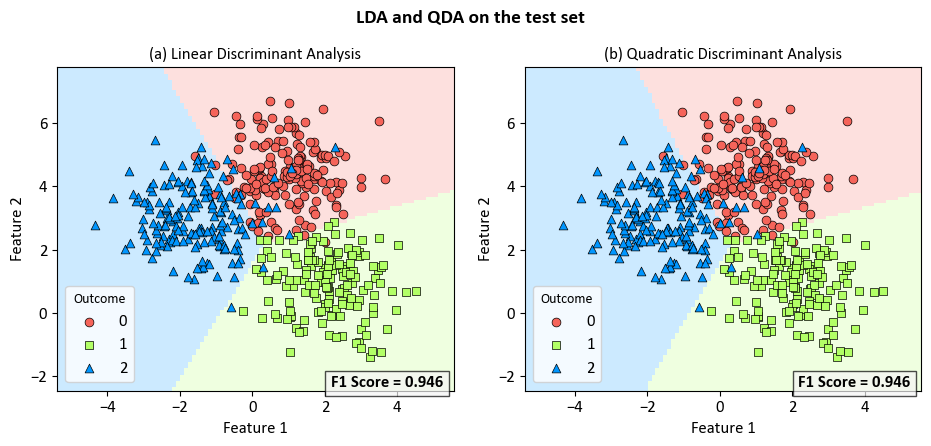

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import re
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

plt.style.use('../mystyle.mplstyle')

# Define color and marker specifications
colors = ["#f5645a", '#B2FF66', '#0096ff']
markers = ['o', 's', '^']
cmap_light = ListedColormap(colors)
cmap_ = ListedColormap(colors)

# Generate synthetic data using the make_blobs function
X, y = make_blobs(n_samples=2000, centers=3, random_state=0, cluster_std=1.0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(9.5, 4.5))

for ax, cls, alph in zip(axes, [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()], 'ab'):
    cls.fit(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(cls, X_test,
                                           cmap=cmap_light, ax=ax,
                                           response_method="predict",
                                           plot_method="pcolormesh",
                                           xlabel='Feature 1', ylabel='Feature 2',
                                           alpha=0.2,
                                           shading="auto")
    # Scatter plot of data points
    for num in np.unique(y):
        ax.scatter(X_test[:, 0][y_test == num], X_test[:, 1][y_test == num], c=colors[num],
                    s=40, edgecolors="k", lw=0.5, marker=markers[num], label=str(num))

    name = ' '.join(re.findall('[A-Z][a-z]*', str(cls).replace("()", "")))
    _ = ax.set(title=f'({alph}) {name}')

    y_pred = cls.predict(X_test)
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    text = ax.text(0.69, 0.01, f'F1 Score = {f1:.3f}',
                   transform=ax.transAxes, fontsize=12, weight='bold',
                   bbox=dict(facecolor='Whitesmoke', alpha=0.7))  # Add background color

    _ = ax.grid(False)

    ax.legend(title = 'Outcome', fontsize = 12)
_ = fig.suptitle('LDA and QDA on the test set', fontsize=14, weight='bold')
plt.tight_layout()

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

models = [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]

# Function to print a line of underscores for separation
def _Line(n = 60, c = '_'):
    print(n * c)

def print_bold(txt, c = 31):
    print(f"\033[1;{c}m" + txt + "\033[0m")
    
# Sample data X and y are assumed to be defined here

# Models to be evaluated
model_alphs = 'ab'

# Loop through each model
for model, alph in zip(models, model_alphs):
    
    name = ' '.join(re.findall('[A-Z][a-z]*', str(model).replace("()", "")))
    
    _Line(n = 80, c = '=')
    print_bold(f'({alph}) {name}', c = 34)
    _Line(n = 80, c = '=')

    # Initialize KFold cross-validator
    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state = 0)
    # The splitt would be 80-20!

    # Lists to store train and test scores for each fold
    train_acc_scores, test_acc_scores, train_f1_scores, test_f1_scores = [], [], [], []
    train_class_proportions, test_class_proportions = [], []

    # DataFrames to store classification reports
    reports_train = pd.DataFrame()
    reports_test = pd.DataFrame()

    # Perform Cross-Validation
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)

        # Calculate class proportions for train and test sets
        train_class_proportions.append([np.mean(y_train == model) for model in np.unique(y)])
        test_class_proportions.append([np.mean(y_test == model) for model in np.unique(y)])

        # train
        y_train_pred = model.predict(X_train)
        train_acc_scores.append(metrics.accuracy_score(y_train, y_train_pred))
        train_f1_scores.append(metrics.f1_score(y_train, y_train_pred, average = 'weighted'))

        # test
        y_test_pred = model.predict(X_test)
        test_acc_scores.append(metrics.accuracy_score(y_test, y_test_pred))
        test_f1_scores.append(metrics.f1_score(y_test, y_test_pred, average = 'weighted'))

    _Line()
    #  Print the Train and Test Scores for each fold
    for fold in range(n_splits):
        print_bold(f'Fold {fold + 1}:')
        print(f"\tTrain Class Proportions: {train_class_proportions[fold]}*{len(y_train)}")
        print(f"\tTest Class Proportions: {test_class_proportions[fold]}*{len(y_test)}")
        print(f"\tTrain Accuracy Score = {train_acc_scores[fold]:.4f}, Test Accuracy Score = {test_acc_scores[fold]:.4f}")
        print(f"\tTrain F1 Score (weighted) = {train_f1_scores[fold]:.4f}, Test F1 Score (weighted)= {test_f1_scores[fold]:.4f}")

    _Line()
    print_bold('Accuracy Score:')
    print(f"\tMean Train Accuracy Score: {np.mean(train_acc_scores):.4f} ± {np.std(train_acc_scores):.4f}")
    print(f"\tMean Test Accuracy Score: {np.mean(test_acc_scores):.4f} ± {np.std(test_acc_scores):.4f}")
    print_bold('F1 Score:')
    print(f"\tMean F1 Accuracy Score (weighted): {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
    print(f"\tMean F1 Accuracy Score (weighted): {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
    _Line()

(a) Linear Discriminant Analysis
____________________________________________________________
Fold 1:
	Train Class Proportions: [0.33375, 0.33375, 0.3325]*1600
	Test Class Proportions: [0.3325, 0.3325, 0.335]*400
	Train Accuracy Score = 0.9281, Test Accuracy Score = 0.9225
	Train F1 Score (weighted) = 0.9279, Test F1 Score (weighted)= 0.9228
Fold 2:
	Train Class Proportions: [0.333125, 0.33375, 0.333125]*1600
	Test Class Proportions: [0.335, 0.3325, 0.3325]*400
	Train Accuracy Score = 0.9319, Test Accuracy Score = 0.9050
	Train F1 Score (weighted) = 0.9319, Test F1 Score (weighted)= 0.9045
Fold 3:
	Train Class Proportions: [0.333125, 0.33375, 0.333125]*1600
	Test Class Proportions: [0.335, 0.3325, 0.3325]*400
	Train Accuracy Score = 0.9275, Test Accuracy Score = 0.9300
	Train F1 Score (weighted) = 0.9274, Test F1 Score (weighted)= 0.9302
Fold 4:
	Train Class Proportions: [0.33375, 0.333125, 0.333125]*1600
	Test Class Proportions: [0.3325, 0.335, 0.3325]*400
	Train Accuracy Score = 0.92

The results show the performance of the two models on five different folds of the data, which were obtained by using stratified k-fold cross-validation. This is a method that splits the data into k equal-sized parts, called folds, and preserves the proportion of the classes in each fold. For each fold, the model is trained on the remaining k-1 folds and tested on the current fold. The accuracy and F1 scores are calculated for both the training and test sets, and the mean and standard deviation of these scores are reported across the k folds.

The accuracy score is the proportion of correctly classified samples, and the F1 score is the harmonic mean of precision and recall, weighted by the number of samples in each class. Both scores range from 0 to 1, with higher values indicating better performance.

The results show that both models have similar performance, with mean test accuracy and F1 scores of 0.9260 and 0.9258, respectively. This means that both models can correctly classify about 92.6% of the test samples, on average. The standard deviations of the scores are also low, indicating that the models are stable and consistent across the folds.

The results also show that the performance of the models varies slightly depending on the fold. For example, the test accuracy and F1 scores are highest in fold 5 and lowest in fold 2 for both models. This suggests that some folds are easier or harder to classify than others, depending on the distribution and separation of the classes in the data.